# A0.ipynb — Введение: От Matplotlib к Plotly

Если библиотека `Matplotlib` позволяет нам генерировать только растровые изображения (любого уровня качества), то при использовании инструментов `Plotly` вы всегда работаете с векторными данными.

Рассмотрим пример из https://www.wemcouncil.org/wp/tech-blog-6-using-python-and-matplotlib-for-plotting-era5-data/ с данными среднегодовой температуры для шести стран (Сенегал, Гамбия, Гвинея-Бисау, Гвинея, Сьерра-Леоне, Либерия) с 1979 по 2018 год.

Ниже представлен код нашего примера.

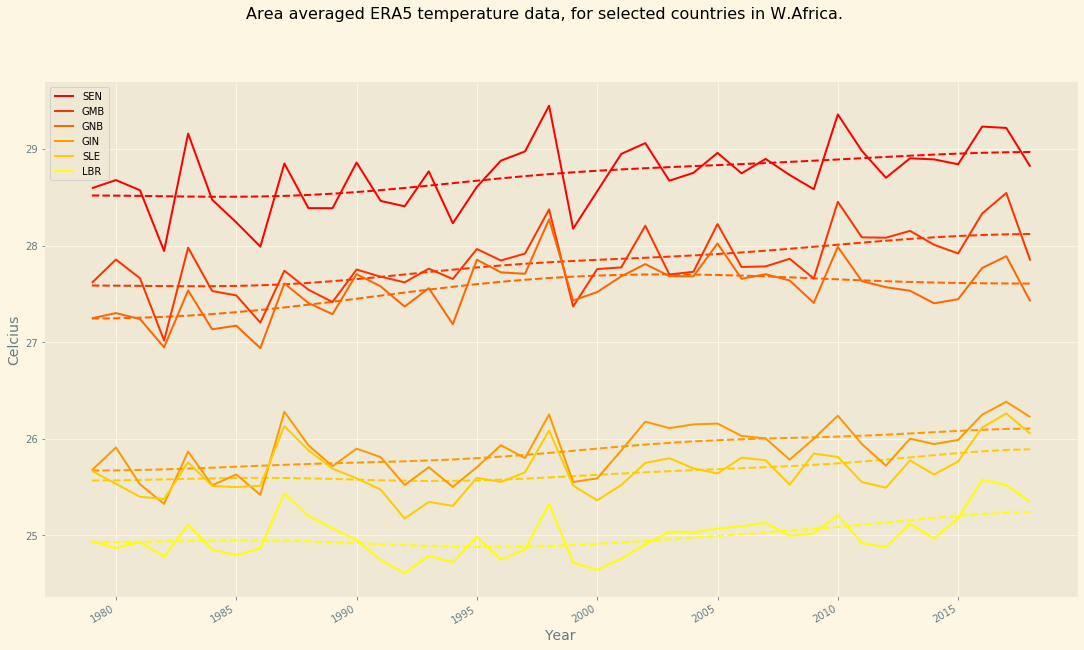

In [ ]:
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d

import io
import requests

# read in csv
df = pd.read_csv('ERA5_TA-_0002m_ADMIN-0_Glob_025d_01y_1979_2018.csv', parse_dates=True, sep=';', index_col=0)

# Create lists for countries, database columns, smoothing
w_africa = ('SEN','GMB','GNB','GIN','SLE','LBR')
w_df = (df.SEN, df.GMB, df.GNB, df.GIN, df.SLE, df.LBR)
colors = ('#FF0000','#FF3300','#FF6600','#FF9900','#FFCC00','#FFFF00')

# wrap plotting inside style context for nice looking plot theme
with plt.style.context('Solarize_Light2'):
    
    # smooth plots with gaussian filter, set sigma for amount of smoothing
    for (w, wd, c) in zip(w_africa, w_df, colors): 
        s = gaussian_filter1d(wd, sigma=5)
        plt.plot(df.index, s ,linestyle='--',color=c) 
    
    # setup plot with labels and title
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Celcius', fontsize=14)
    fig.suptitle('Area averaged ERA5 temperature data, for selected countries in W.Africa.', fontsize=16)
    
    # add the unsmoothed line plots per country for reference
    for wd, c in zip(w_df, colors):
        wd.plot(color = c)
    plt.legend()
plt.show()

Не будем вдаваться в подробности этого кода — в результате использования уже известной вам библиотеки удалось построить очень симпатичный график в `Matplotlib`. Однако у него есть недостаток — отсутствует интерактивность.

# Plotly — быстрый старт с библиотекой Cufflinks

Ваших знаний библиотеки `Matplotlib` достаточно, чтобы сразу начать работу с библиотекой `Plotly`. Для этого используем библиотеку `Cufflinks`, она помогает генерировать интерактивные графики Plotly с использованием синтаксиса, похожего на `Matplotlib`. Мы используем её только для знакомства и простой демонстрации, а в дальнейшем перейдём на чистый `Plotly`.

In [ ]:
import cufflinks as cf

По умолчанию библиотека требует подключения к серверу Plotly, однако сейчас удобнее её использовать без этого. Переведём её в так называемый режим offline: https://nbviewer.jupyter.org/gist/santosjorge/5fdbe947496faf7af5e6

In [ ]:
cf.go_offline()

Посмотрим наш набор данных, по которому будем строить графики. 

In [ ]:
africa = df.loc[:,w_africa]
africa.head(10)

,SEN,GMB,GNB,GIN,SLE,LBR
Year,,,,,,
1979-01-01,28.59350,27.61303,27.24590,25.67100,25.66415,24.93640
1980-01-01,28.67800,27.85464,27.29955,25.90737,25.53134,24.86364
1981-01-01,28.57240,27.66020,27.23794,25.52596,25.39630,24.92822
1982-01-01,27.94280,27.01590,26.94528,25.32308,25.37340,24.77490
1983-01-01,29.15957,27.97735,27.53450,25.86456,25.75292,25.10677
1984-01-01,28.47448,27.52834,27.13210,25.51537,25.50872,24.84900
1985-01-01,28.23925,27.48266,27.16952,25.62774,25.49664,24.79235
1986-01-01,27.98858,27.20138,26.93588,25.41620,25.51110,24.86224
1987-01-01,28.84927,27.73882,27.60760,26.27706,26.12945,25.42965


В первой колонке указывается год, за который рассчитана средняя температура в одной из шести стран.

Используем метод `iplot`, похожий на метод `plot` библиотеки `Matplotlib`, следующим образом:

In [ ]:
africa.iplot(title='Area averaged ERA5 temperature data, for selected countries in W.Africa.',
             xTitle='Year',
             yTitle='Celcius')

Мы получили интерактивный график вместо растрового, всё уже раскрашено и выглядит красиво.

Для быстрого старта с `Plotly` можно использовать библиотеку `Cufflinks`. Она позволяет, используя богатые возможности визуализации библиотеки `Pandas` и почти похожий синтаксис, получать не растровые графики, а сразу интерактивные, построенные на базе библиотеки `Plotly`.

Посмотрим, как бы это могло выглядеть с использованием `Pandas` + `Matplotlib`:

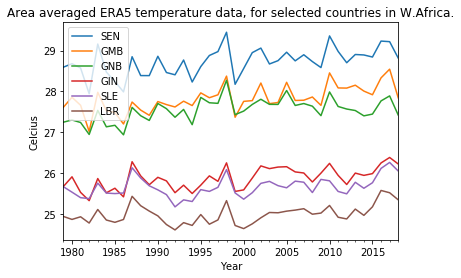

In [ ]:
ax = africa.plot(title='Area averaged ERA5 temperature data, for selected countries in W.Africa.');
ax.set_xlabel("Year");
ax.set_ylabel("Celcius");

Выглядит так же просто, однако не интерактивно — это просто растровая картинка.

Получилось быстро и в несколько строк, но не так удобно — графику явно нужен «тюнинг». Предлагаю вам освежить ваши навыки в библиотеке Matplotlib и сделать в рамках **практического задания** следующее:
- позиционировать легенду под графиком, в горизонтальной ориентации;
- заменить цвет фона на #EDE8D7;
- сделать заголовок двухстрочным.

Вернёмся к нашему интерактивному графику и разберём некоторые кнопки панели управления графиком — она появляется, если навести на график курсор:

In [ ]:
africa.iplot(title='Area averaged ERA5 temperature data, for selected countries in W.Africa.',
             xTitle='Year',
             yTitle='Celcius')

Элементы интерактивной панели позволяют:
- скачать график как картинку;
- взаимодействовать с графиком: увеличивать или уменьшать область, изучать значения по осям и прочее.